In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns

In [17]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
df.shape, df.isnull().sum()

((50000, 2),
 review       0
 sentiment    0
 dtype: int64)

In [19]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [20]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [21]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:>

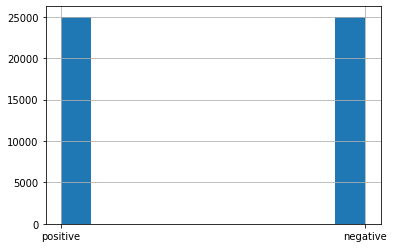

In [22]:
df["sentiment"].hist()

## Label Encoding

In [23]:
label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Feature Matrix and Target Vector Extraction

In [24]:
X = df["review"]
y = df["sentiment"]

In [ ]:
# Remove all special and numeric character 
# from data and also stopwords (ie is, am, this, that) then apply stemming

ps = PorterStemmer()
corpus = []

for i in range(len(X)):
    #print(i)
    review = re.sub("[^a-zA-Z]"," ", X[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

## Apply TF-IDF

** TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The `TfidfVectorizer` will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

X.shape

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

In [ ]:
# Instantiate Naive Bayes Model
mnb = MultinomialNB()
mnb.fit(X_train , y_train)

## Evaluate Model

In [ ]:
y_pred = mnb.predict(X_test)

In [ ]:
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred)

In [ ]:
# Difference between predicted and actual data
pd.DataFrame(np.c_[y_test , y_pred] , columns=["Actual" , "Predicted"])

## Save my trained naive-bayes model and TfidfVectorizer

In [ ]:
pickle.dump(cv , open("count-Vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("Movies_Review_Classification.pkl" , "wb"))  

## Load my naive-bayes model and TfidfVectorizer

In [ ]:
save_cv = pickle.load(open('count-Vectorizer.pkl','rb'))
model = pickle.load(open('Movies_Review_Classification.pkl','rb'))

## Test the model

In [ ]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [ ]:
sen = 'This is the wonderful movie of my life'
res = test_model(sen)
print(res)

In [ ]:
sen = 'This is the worst movie of my life'
res = test_model(sen)
print(res)